# TMA4320 - Project 3: <br> Simulating the action potential with random walk of ions
**Group number:** 27 <br>
**Group members:** Marte K. Høiskar, Maren Lium and Johanna U. Marstrander

## 1 $\,$ Theory
Skal vi skrive noe her?

In one dimention the diffusion equation takes the form 

\begin{equation}
    \frac{\partial \phi \left( x, t \right)}{\partial x} = \frac{\partial}{\partial x} \left( D \left( x \right) \frac{\partial \phi (x, t)}{\partial x} \right),
    \label{Diffusion equation}
\end{equation}

where $\phi(x,t)$ is the distribution of a substance and $D(x)$ is the (position dependent) diffusion coefficient.

## 2 $\,$ Excercises

### Excercise 2.1
*Task:* <br>
Show that the function

\begin{equation}
    \tilde{\phi} \left( x, t \right) = \frac{1}{\sqrt{4 \pi D t}} e^{ - \frac{\left( x - \mu \right)^2}{4Dt} },
\end{equation}

where D is a constant, is a solution of the diffusion equation.

*Answer:*<br>

### Excercise 2.2
#### 2.2.1
*Task:*<br>
(Initial value problem.) Given the particle distribution

\begin{equation}
    \phi \left( x, 0 \right)
    =
    \delta \left( x - x_0 \right),
\end{equation}

where $\delta(x)$ is the dirac delta function, find the particle distribution a time $t$.

*Answer:*<br>

#### 2.2.2
*Task:*<br>
Use the results of Exercise 2.2.1 to give a physical interpretation of the diffusion coefficient D.

*Answer:*<br>

#### 2.2.3
*Task:*<br>
Use the results from Exercise 2.2.1 to find the time evolution $\phi(x, t)$ given another initial condition $\phi(x, 0) = g(x)$, where $g(x)$ is an arbitrary function.

*Answer:*<br>

## 3 $\,$ Programming  
*Random walk in 1D*

In [49]:
from random import randint
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy import constants as const

Theory says:	Mu = 0		Std = 14.1421
Men vi faar:	Mu = 4.97512	Std = 15.9166


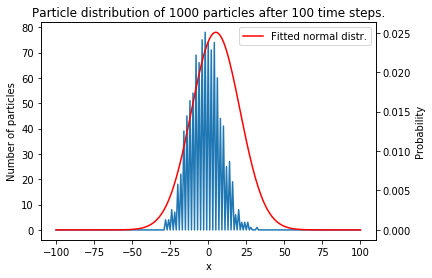

In [50]:
particles = 1000             # number of particles at x = 0
time_steps = 100             # number of time steps 
d = 1                        # probability of a particle moving (in an arbitrary direction)


def random_walk(p_right, pos, h = 1):
    '''Input: probability d, steplength h, and a temporary position vector pos_vec
    (temporary meaning that the last element is at time t so that the return value is the position at time t + dt)
    Output: the next location of the particle'''
    
    r = randint(0, 101) / 100           # Generates a random number between 0.01 and 1
    if r < p_right:                     # Right step
        return pos + h
    else:                               # Left step
        return pos - h

    
def random_walk_in_1D(p_right = np.ones(201)*d/2):
    '''Answer to part 3'''
    
    dist = np.zeros(201)                # Distribution array
    
    for p in range(particles):          # Loops through every paricle
        i = 0
        for s in range(time_steps):     # Loops through time_steps per particle
            i = random_walk(p_right[s], i)
        dist[i + 100] += 1              # Places the particle nr p in dist
    
    return dist


dist_1D = random_walk_in_1D()


def task_3_plot():
    
    #Plotting our data
    x_axis = np.linspace(-100, 100, 201)
   
    title = f"Particle distribution of {particles} particles after {time_steps} time steps."

    fig, ax1 = plt.subplots()
    plt.title(title)
    ax1.plot(x_axis, dist_1D, label="Particle distribution")
    ax1.set_xlabel("x")
    ax1.set_ylabel("Number of particles")

    #Plotting a fitted normal distribution
    muf, stdf = norm.fit(dist_1D)                            # the (ish) expected value and standard deviation of our particle  
    norm_dist = norm.pdf(x_axis, loc = muf, scale = stdf)    # the fitted normal distribution
    
    ax2 = ax1.twinx()
    ax2.set_ylabel("Probability")
    ax2.plot(x_axis, norm_dist, "r-" ,label="Fitted normal distr.")
    #ax2.plot(x_axis, norm.pdf(x_axis, loc = 0, scale = np.sqrt(2*100)), "b-" ,label="Theory says")

    plt.legend()    
    
    print(f"Theory says:\tMu = {0}\t\tStd = {np.sqrt(2*100):.6}")
    print(f"Men vi faar:\tMu = {muf:.6}\tStd = {stdf:.6}")
    
    
task_3_plot()

*Explanation of the results based on the theory from section 1 and 2*:


## 4 $\,$ Theory
Skal vi skrive noe som helst her? 

## 5 $\,$ Programming 
*Random walk in a potential*

In [53]:
temperature = 298.15
k = -1e-21
beta = 1 / (const.k * temperature)   # Where k is the Boltzmann constant and 298.15 is the temperature in kelvin


def p_right(V, x, beta, h = 1):
    return 1 / (1 + np.exp(-beta*(V(x-h) - V(x+h))))

### Excercise 5.1

\begin{equation}
    V \left( x \right) = kx.
\end{equation}

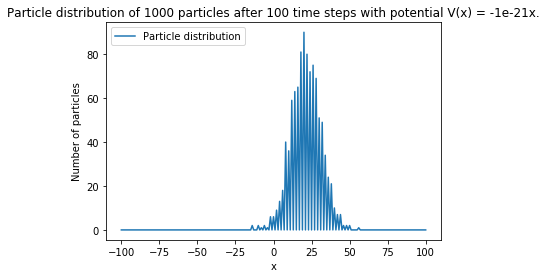

In [54]:
def V1(x):     #please kom på bedre navn, jeg orker ikke
    return k*x


x = np.linspace(-100, 100, 201)    # the x-axis
pr_vec = p_right(V1, x, beta)      # an array consisting of the probabilities of a particle moving right based on the position and potential field

dist_2 = random_walk_in_1D(pr_vec) # the particle distribution due to the field 

#Plotting our data
title = f"Particle distribution of {particles} particles after {time_steps} time steps with potential V(x) = {k}x."

plt.figure(title)
plt.title(title)
plt.plot(x, dist_2, label="Particle distribution")
plt.xlabel("x")
plt.ylabel("Number of particles")
plt.legend()